# Импорт библиотек

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,  SGDRegressor, BayesianRidge  
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка исходных данных

In [2]:
df_bp = pd.read_excel('/content/drive/MyDrive/VKR/X_bp.xlsx', sheet_name='X_bp.csv', index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [3]:
df_nup = pd.read_excel('/content/drive/MyDrive/VKR/X_nup.xlsx', sheet_name='X_nup.csv', index_col=0)
df_nup.head(45)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
5.0,0.0,5.000000,60.000000
6.0,0.0,5.000000,70.000000
7.0,0.0,7.000000,47.000000
8.0,0.0,7.000000,57.000000
9.0,0.0,7.000000,60.000000


Все три признака, представленные в датасете df_nup по первым 20 значениям можно расценивать как дискретные, что вполне оправдано для представленных категорий, однако в диапазоне от 20 и до 1022 данные в колонках "Плотность нашивки" и "Шаг нашивки" представлены непрерывными значениями.
Возможно, данные в диапазоне (20; 1022) были подвергнуты преобразованию.


Объединение данных в один датафрейм

In [4]:
df = df_bp.join(df_nup,  how='inner')
df.head(50)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
7.0,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0.0,7.000000,47.000000
8.0,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0.0,7.000000,57.000000
9.0,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0.0,7.000000,60.000000


Разделим наш датафрейм на три и произведем обучение моделей на двух датафреймах и сопоставим результаты:
Датафрейм № 1 - объединенный по индексам датасет без разделения;
Датафрейм № 2 - объединенный по индексам датасет из первых 39 строк с дискретными значениями;
Датафрейм № 3 - экспериментальный, исключающий все дискретные значения;

In [5]:
df1 = df.drop(labels=range(40,1023), axis=0)
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,57.0
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,60.0
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,70.0
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,47.0
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,57.0
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,60.0
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,70.0
7.0,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0.0,7.0,47.0
8.0,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0.0,7.0,57.0
9.0,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0.0,7.0,60.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 40 entries, 0.0 to 39.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       40 non-null     float64
 1   Плотность, кг/м3                      40 non-null     float64
 2   модуль упругости, ГПа                 40 non-null     float64
 3   Количество отвердителя, м.%           40 non-null     float64
 4   Содержание эпоксидных групп,%_2       40 non-null     float64
 5   Температура вспышки, С_2              40 non-null     float64
 6   Поверхностная плотность, г/м2         40 non-null     float64
 7   Модуль упругости при растяжении, ГПа  40 non-null     float64
 8   Прочность при растяжении, МПа         40 non-null     float64
 9   Потребление смолы, г/м2               40 non-null     float64
 10  Угол нашивки, град                    40 non-null     float64
 11  Шаг нашивки    

In [7]:
# проверяем наличие дубликатов в данных
df1.duplicated().sum()

0

In [8]:
# подсчет уникальных значеий по каждому признаку
df1.apply(lambda x: x.nunique())

Соотношение матрица-наполнитель         31
Плотность, кг/м3                        30
модуль упругости, ГПа                   37
Количество отвердителя, м.%             22
Содержание эпоксидных групп,%_2         21
Температура вспышки, С_2                20
Поверхностная плотность, г/м2           21
Модуль упругости при растяжении, ГПа    21
Прочность при растяжении, МПа           21
Потребление смолы, г/м2                 20
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
dtype: int64

Визуализация входных данных. Гистограммы распределения значений признаков

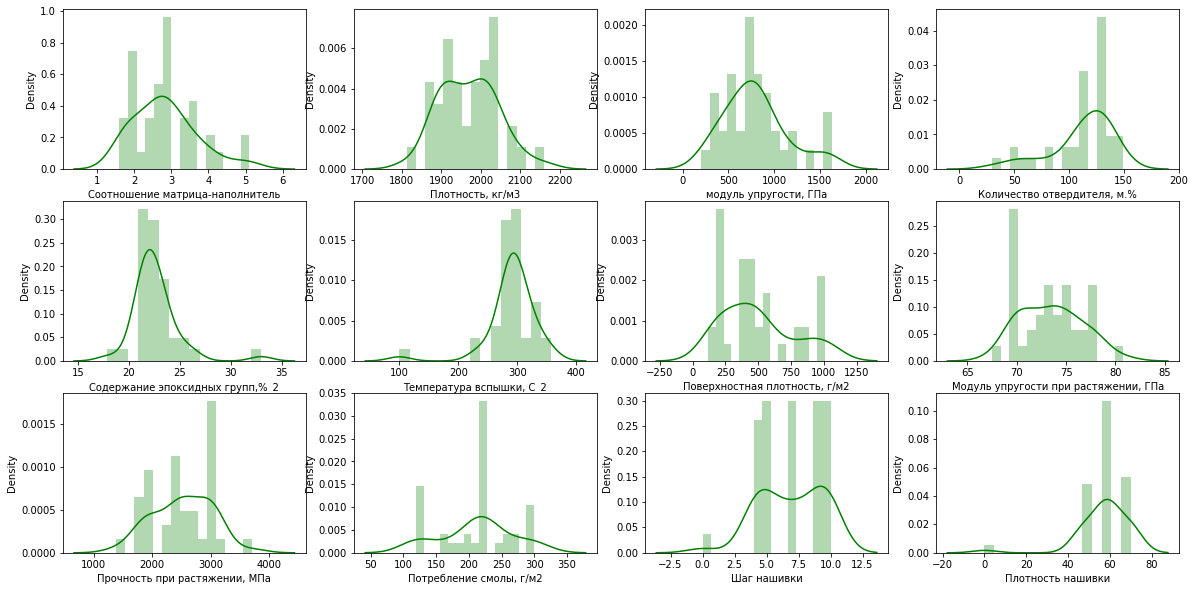

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.distplot(df1['Соотношение матрица-наполнитель'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 2)
sns.distplot(df1['Плотность, кг/м3'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 3)
sns.distplot(df1['модуль упругости, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 4)
sns.distplot(df1['Количество отвердителя, м.%'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 5)
sns.distplot(df1['Содержание эпоксидных групп,%_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 6)
sns.distplot(df1['Температура вспышки, С_2'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 7)
sns.distplot(df1['Поверхностная плотность, г/м2'], color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 8)
sns.distplot(df1['Модуль упругости при растяжении, ГПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 9)
sns.distplot(df1['Прочность при растяжении, МПа'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 10)
sns.distplot(df1['Потребление смолы, г/м2'],color="green", bins=15, hist_kws={'alpha':0.3})
plt.subplot(3, 4, 11)
sns.distplot(df1['Шаг нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})
plt.subplot(3, 4, 12)
sns.distplot(df1['Плотность нашивки'],color="green",bins=15,hist_kws={'alpha':0.3})

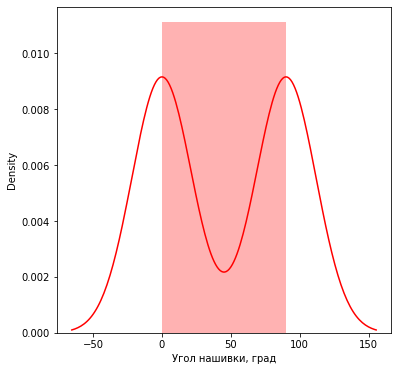

In [10]:
plt.figure(figsize=(6,6))
plt.subplot(1, 1, 1)
sns.distplot(df1['Угол нашивки, град'],color="red", hist_kws={'alpha':0.3})

параметр "Угол нашивки" имеет два дискретных значения, которые представлены примерно в равных пропорциях

данные в большинстве своем имеют, распределение, близкое к нормальному за исключением параметра "Угол нашивки", где определены только два дискретных значения: 0 и 90 град.

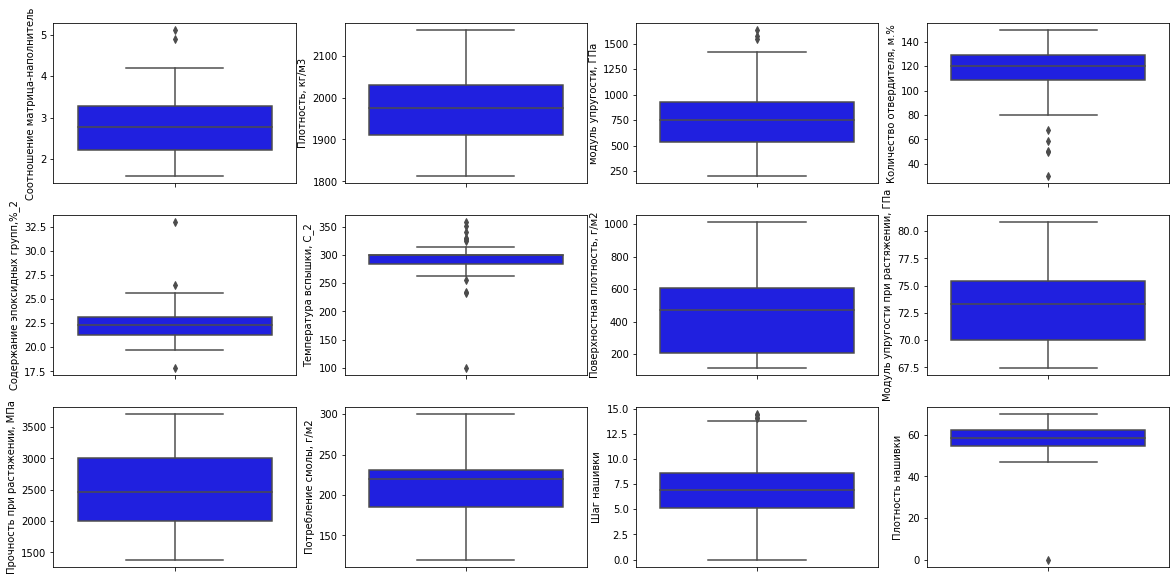

In [11]:
# строим боксплоты (ящики с усами)
plt.figure(figsize=(20,10))
plt.subplot(3, 4, 1)
sns.boxplot(y='Соотношение матрица-наполнитель', data=df1, color="blue")
plt.subplot(3, 4, 2)
sns.boxplot(y='Плотность, кг/м3', data=df1, color="blue")
plt.subplot(3, 4, 3)
sns.boxplot(y='модуль упругости, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 4)
sns.boxplot(y='Количество отвердителя, м.%', data=df1, color="blue")
plt.subplot(3, 4, 5)
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df1, color="blue")
plt.subplot(3, 4, 6)
sns.boxplot(y='Температура вспышки, С_2', data=df1, color="blue")
plt.subplot(3, 4, 7)
sns.boxplot(y='Поверхностная плотность, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 8)
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df1, color="blue")
plt.subplot(3, 4, 9)
sns.boxplot(y='Прочность при растяжении, МПа', data=df1, color="blue")
plt.subplot(3, 4, 10)
sns.boxplot(y='Потребление смолы, г/м2', data=df1, color="blue")
plt.subplot(3, 4, 11)
sns.boxplot(y='Шаг нашивки', data=df, color="blue")
plt.subplot(3, 4, 12)
sns.boxplot(y='Плотность нашивки', data=df1, color="blue")

Обнаружены выбросы во всех параметрах, наиюольшее количество в колонках "Плотность", "Плотность нашивки", "Потребление смолы" и "Температура вспышки"

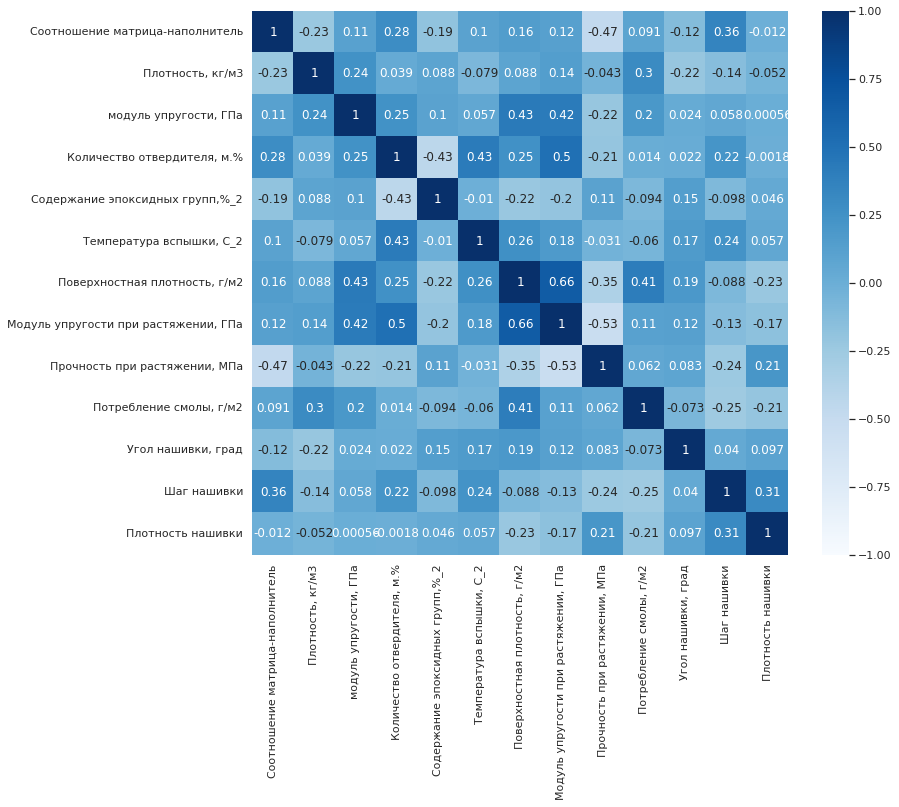

In [71]:
# строим матрицу корреляции
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Blues')

Изучив матрицу корреляции наблюдаем довольно малые значения, что говорит об отсуствии линейной зависимости между признаками. Предположим наличие нелинейной сложной зависимости между признаками

Строим матрицу рассеивания точек

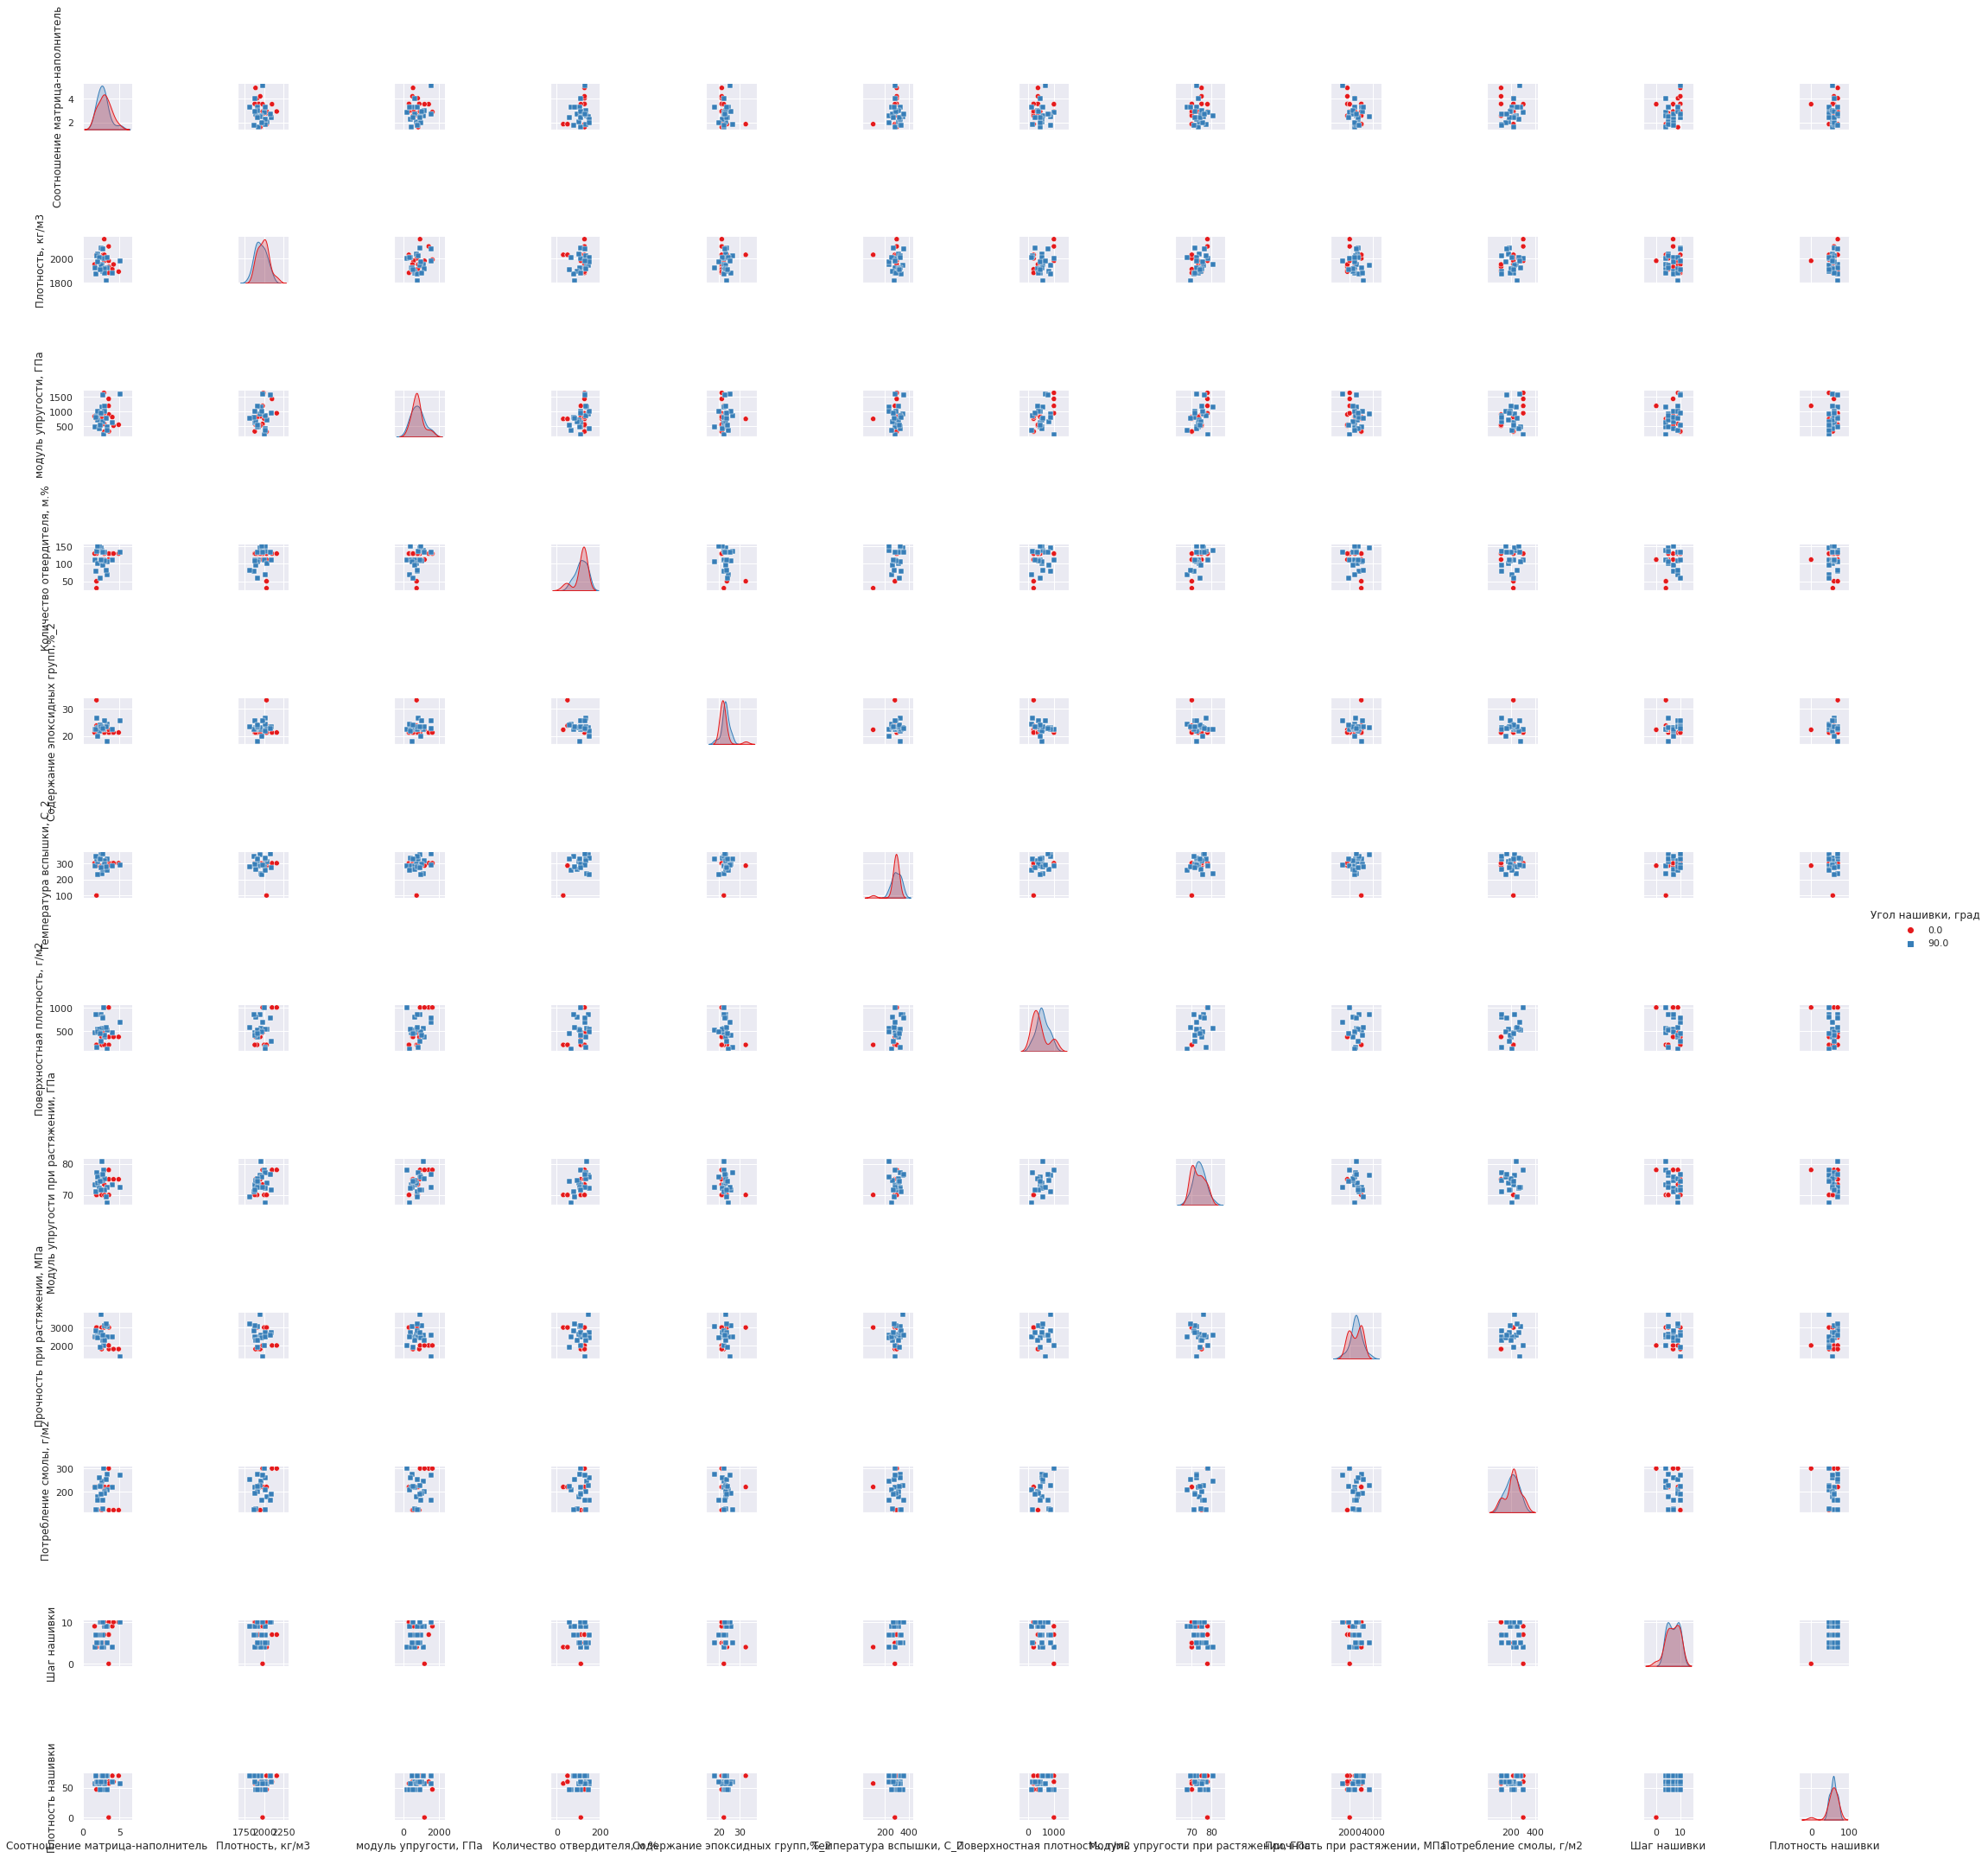

In [130]:
col = df1.columns
m_pair_grid = sns.pairplot(df1, hue = 'Угол нашивки, град', markers=["o", "s"], diag_kind= 'auto', palette='Set1')

In [14]:
# проверка наличия пропусков в данных
df1.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков в данных нет, но обнаружены выбросы во всех компонентах (колонках) датасета, кроме Угла нашивки.

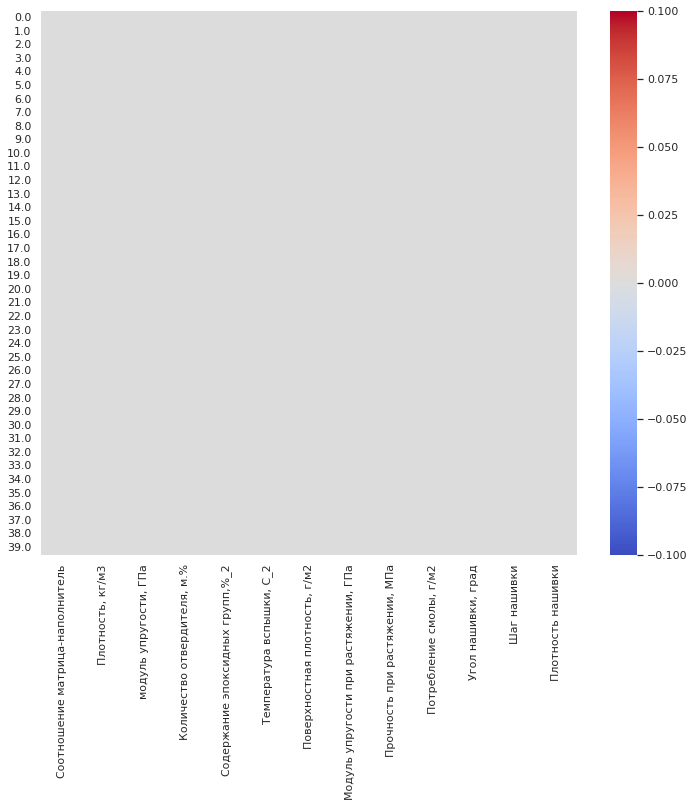

In [15]:
sns.heatmap(df1.isnull(),cmap="coolwarm")
plt.show()

## Удаление выбросов

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,40.0,2.831256,0.848290,1.598174,2.223737,2.769625,3.284199,5.098993
"Плотность, кг/м3",40.0,1969.810420,73.536838,1813.234600,1910.000000,1975.484072,2030.000000,2160.000000
"модуль упругости, ГПа",40.0,793.464589,344.647852,205.000000,538.750000,750.500000,931.732977,1628.000000
"Количество отвердителя, м.%",40.0,112.488835,28.453910,30.000000,108.376380,120.430000,129.000000,149.372832
"Содержание эпоксидных групп,%_2",40.0,22.599959,2.284052,17.874100,21.250000,22.267857,23.175744,33.000000
"Температура вспышки, С_2",40.0,291.233848,40.586251,100.000000,284.615385,300.000000,300.000000,357.972896
"Поверхностная плотность, г/м2",40.0,495.934107,275.139640,117.535234,210.000000,470.000000,603.888352,1010.000000
"Модуль упругости при растяжении, ГПа",40.0,73.468477,3.141617,67.478707,70.000000,73.333333,75.384264,80.803222
"Прочность при растяжении, МПа",40.0,2519.604922,505.136369,1386.578973,2000.000000,2467.896290,3000.000000,3705.672523
"Потребление смолы, г/м2",40.0,212.068096,54.703508,120.000000,185.445669,220.000000,231.320349,300.000000


Выбросы устранены, но данные по различным признакам имеют большой разброс. Произведем нормализацию данных для приведения значений признаков к диапазону (0; 1)

In [17]:
# Нормализация. MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df1), columns=df1.columns, index=df1.index)


In [18]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,40.0,0.352227,0.242312,0.0,0.178691,0.334622,0.481609,1.0
"Плотность, кг/м3",40.0,0.451532,0.212065,0.0,0.279051,0.467894,0.625107,1.0
"модуль упругости, ГПа",40.0,0.413538,0.242198,0.0,0.234540,0.383345,0.510705,1.0
"Количество отвердителя, м.%",40.0,0.691018,0.238362,0.0,0.656568,0.757543,0.829334,1.0
"Содержание эпоксидных групп,%_2",40.0,0.312435,0.151003,0.0,0.223187,0.290479,0.350501,1.0
"Температура вспышки, С_2",40.0,0.741294,0.157328,0.0,0.715639,0.775275,0.775275,1.0
"Поверхностная плотность, г/м2",40.0,0.423993,0.308292,0.0,0.103606,0.394934,0.544955,1.0
"Модуль упругости при растяжении, ГПа",40.0,0.449530,0.235777,0.0,0.189222,0.439388,0.593309,1.0
"Прочность при растяжении, МПа",40.0,0.488564,0.217816,0.0,0.264509,0.466267,0.695712,1.0
"Потребление смолы, г/м2",40.0,0.511489,0.303908,0.0,0.363587,0.555556,0.618446,1.0


# Построение моделей для целевой переменной "Модуль упругости при растяжении, ГПа"

In [19]:
# Определение факторов и целевых переменных Х и у; разделение датасета на train и test выборку 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
                 axis=1)  
y = df_norm['Модуль упругости при растяжении, ГПа'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

In [131]:
print("Размер тренировочного датасета на входе:", X_train.shape)
print("Размер тестового датасета на входе:", X_test.shape)
print("Размер тренировочного датасета на выходе:", y_train.shape)
print("Размер тестового датасета на выходе:", y_test.shape)

Размер тренировочного датасета на входе: (28, 10)
Размер тестового датасета на входе: (12, 10)
Размер тренировочного датасета на выходе: (28,)
Размер тестового датасета на выходе: (12,)


In [110]:
# Создаем датафрейм для записи метрик обученных моделей
upr_metric = pd.DataFrame()

Функция обучения и оценки модели

In [20]:
def regression_fit(regressID, X, y, X_v, y_v):
  model = regressID
  model_fit = model.fit(X, y)
  model_score_train = model.score(X, y)
  model_score_test = model.score(X_v, y_v)
  y_pred = model.predict(X_v)
  mae = mean_absolute_error(y_v, y_pred)
  mse = mean_squared_error(y_v, y_pred)
  max_er = max_error(y_v, y_pred)
  r_2 = r2_score(y_v, y_pred)

  print("Train_score = ", model_score_train)
  print("Test_score = ", model_score_test)
  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("Max error = ", max_er)
  print("R2_score = ", r_2)
  
  return mae, mse, max_er, r_2


In [21]:
# Функция обучения моделей с использованием кросс-валидации 
def regression_cv(regressID, X, y):
  shuffle_x = ShuffleSplit(n_splits=10, test_size=0.3, random_state=20)
  model_cv = cross_validate(estimator=regressID, X=X, y=y, cv=shuffle_x, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
  mae = model_cv['test_neg_mean_absolute_error'].mean()
  mse = model_cv['test_neg_mean_squared_error'].mean()
  r_2 = model_cv['test_r2'].mean()

  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("R2_score = ", r_2)
  
  return mae, mse, r_2

Линейная регрессия

In [111]:
regressor_lr = LinearRegression()
lr = regression_fit(regressID=regressor_lr, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.3883219627100277
Test_score =  0.04804785435363579
mean_absolute_error =  0.252074785975006
mean_squared_error =  0.09823992668703808
Max error =  0.628204836820911
R2_score =  0.04804785435363579


In [112]:
results_lr = regression_cv(regressID=regressor_lr, X=X, y=y)

mean_absolute_error =  -0.2518002962556778
mean_squared_error =  -0.1097173891832776
R2_score =  -1.4510599422646693


In [113]:
lr_metric = pd.DataFrame({'ModelId': 'Licear Regresion',
                          'MAE': mae,
                          'MSE': mse,
                          'R2': r_2}, index=['Модуль упругости при растяжении'])
upr_metric.loc[] = pd.concat([upr_metric, lr_metric])

In [115]:
regressor_lasso = Lasso(alpha=0.1)
lasso = regression_fit(regressID=regressor_lasso, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  -4.884981308350689e-15
Test_score =  -0.022521533177215725
mean_absolute_error =  0.25401325998258495
mean_squared_error =  0.10552257370777966
Max error =  0.6622360348701477
R2_score =  -0.022521533177215725


In [116]:
results_lasso = regression_cv(regressID=regressor_lasso, X=X, y=y)

mean_absolute_error =  -0.18918668168182196
mean_squared_error =  -0.058786430792186664
R2_score =  -0.1741051096705081


In [121]:
lasso_metric = pd.DataFrame({'ModelId': 'Lasso',
                          'MAE': mean_absolute_error,
                          'MSE': mse,
                          'R2': r_2}, index=['Модуль упругости при растяжении'])
upr_metric = pd.concat([upr_metric, lasso_metric])

In [26]:
regressor_br = BayesianRidge(n_iter=100)
bayes_ridge = regression_fit(regressID=regressor_br, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.8248010559589474
Test_score =  0.007688802409420825
mean_absolute_error =  0.15625960573834372
mean_squared_error =  0.04413485285923805
Max error =  0.42957357550888253
R2_score =  0.007688802409420825


In [27]:
results_br = regression_cv(regressID=regressor_br, X=X, y=y)

mean_absolute_error =  -0.1577742399557461
mean_squared_error =  -0.044059595420262235
R2_score =  -0.06048300007135297


In [28]:
regressor_xgb = XGBRegressor(max_depth=2, random_state=20)
result_xgb = regression_cv(regressID=regressor_xgb, X=X, y=y)

[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [29]:
regressor_rf = RandomForestRegressor(n_estimators=200)
rfr = regression_fit(regressID=regressor_rf, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.9378287108396514
Test_score =  0.34650414672086427
mean_absolute_error =  0.11088137378886805
mean_squared_error =  0.029065421612320518
Max error =  0.47837693052235297
R2_score =  0.34650414672086427


In [30]:
result_rfr = regression_cv(regressID=regressor_rf, X=X, y=y)

mean_absolute_error =  -0.12395055074900103
mean_squared_error =  -0.034411679852922865
R2_score =  0.17439877430253842


Обучение с помощью линейных моделей: LinearRegression, Lasso, BayesianRidge; XGBoostRegression; RandomForestRegresion не принесло положительных результатов. Коэффициент детерминаци при всех процедурах обучения близок к нулю, что говорит о том, что оценка дает значение, близкое к среднему, а значит, модели не могут "объяснить" дисперсию таргета через признаки.

# Произведем подбор оптимальных гиперпараметов при помощи GridSearchCV и RandomizedSearchCV

In [31]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(regressor_rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=20)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': False,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [32]:
# Обучение модели
rfcv = RandomForestRegressor(bootstrap=False, max_depth=11, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=600)
rfcv_train = rfcv.fit(X_train, y_train)
rfcv_predict = rfcv.predict(X_test)

In [33]:
# оценка работы модели
mae = mean_absolute_error(y_test, rfcv_predict)
mse = mean_squared_error(y_test, rfcv_predict)
max_er = max_error(y_test, rfcv_predict)
r_2 = r2_score(y_test, rfcv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.09524375386420281
mean_squared_error =  0.023807264591554588
Max error =  0.4609351860419292
R2_score =  0.4647265435879563


In [34]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt', 'log2']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(regressor_rf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
gs.best_params_
# {'bootstrap': False,
# 'max_depth': 7,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 3,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [35]:
# Обучение модели
gscv = RandomForestRegressor(bootstrap=False, max_depth=11, max_features='sqrt', min_samples_leaf=2, min_samples_split=3, n_estimators=300)
gscv_train = gscv.fit(X_train, y_train)
gscv_predict = gscv.predict(X_test)

In [36]:
# оценка работы модели
mae = mean_absolute_error(y_test, gscv_predict)
mse = mean_squared_error(y_test, gscv_predict)
max_er = max_error(y_test, gscv_predict)
r_2 = r2_score(y_test, gscv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.09514957063635787
mean_squared_error =  0.024755626844086595
Max error =  0.47477337582316226
R2_score =  0.44340392843024523


Оба инструмента поиска оптимальных гиперпараметров для модели показали неудовлетворительные результаты. 

# Построение моделей для целевой переменной "Прочность при растяжении, МПа"

In [37]:
# Определение факторов и целевых переменных Х и у; разделение датасета на train и test выборку 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
                 axis=1)  
y = df_norm['Прочность при растяжении, МПа'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

Функция обучения и оценки модели

In [38]:
def regression_fit(regressID, X, y, X_v, y_v):
  model = regressID
  model_fit = model.fit(X, y)
  model_score_train = model.score(X, y)
  model_score_test = model.score(X_v, y_v)
  y_pred = model.predict(X_v)
  mae = mean_absolute_error(y_v, y_pred)
  mse = mean_squared_error(y_v, y_pred)
  max_er = max_error(y_v, y_pred)
  r_2 = r2_score(y_v, y_pred)

  print("Train_score = ", model_score_train)
  print("Test_score = ", model_score_test)
  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("Max error = ", max_er)
  print("R2_score = ", r_2)
  
  return mae, mse, max_er, r_2


In [39]:
# Функция обучения моделей с использованием кросс-валидации 
def regression_cv(regressID, X, y):
  shuffle_x = ShuffleSplit(n_splits=10, test_size=0.3, random_state=20)
  model_cv = cross_validate(estimator=regressID, X=X, y=y, cv=shuffle_x, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'))
  mae = model_cv['test_neg_mean_absolute_error'].mean()
  mse = model_cv['test_neg_mean_squared_error'].mean()
  r_2 = model_cv['test_r2'].mean()

  print("mean_absolute_error = ", mae)
  print("mean_squared_error = ", mse)
  print("R2_score = ", r_2)
  
  return mae, mse, r_2

Линейная регрессия

In [40]:
regressor_lr = LinearRegression()
lr = regression_fit(regressID=regressor_lr, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.4772109748119022
Test_score =  0.114162721187546
mean_absolute_error =  0.1228041533832261
mean_squared_error =  0.04372799316525766
Max error =  0.5859770033352322
R2_score =  0.114162721187546


In [41]:
results_lr = regression_cv(regressID=regressor_lr, X=X, y=y)

mean_absolute_error =  -0.1742825073481417
mean_squared_error =  -0.05774072362739633
R2_score =  -0.6317795136472986


In [42]:
regressor_lasso = Lasso(alpha=0.1)
lasso = regression_fit(regressID=regressor_lasso, X=X_train, y=y_train, X_v=X_test, y_v=y_test)

Train_score =  0.0
Test_score =  -0.014496066310111022
mean_absolute_error =  0.1734388468929825
mean_squared_error =  0.05007903608805048
Max error =  0.49658921684176116
R2_score =  -0.014496066310111022


In [43]:
results_lasso = regression_cv(regressID=regressor_lasso, X=X, y=y)

mean_absolute_error =  -0.17251316189473842
mean_squared_error =  -0.044488590940180144
R2_score =  -0.24963433271985794


In [44]:
regressor_br = BayesianRidge(n_iter=100)
bayes_ridge = regression_fit(regressID=regressor_br, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.1983910664050087
Test_score =  0.04371509399944151
mean_absolute_error =  0.15911487349836476
mean_squared_error =  0.04720553179889903
Max error =  0.4792850064851571
R2_score =  0.04371509399944151


In [45]:
results_br = regression_cv(regressID=regressor_br, X=X, y=y)

mean_absolute_error =  -0.16776335809807363
mean_squared_error =  -0.042809904303463514
R2_score =  -0.2148758936648208


In [46]:
regressor_xgb = XGBRegressor(max_depth=2, random_state=20)
result_xgb = regression_cv(regressID=regressor_xgb, X=X, y=y)

[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [47]:
# Ансамблевый метод RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=200)
rfr = regression_fit(regressID=regressor_rf, X=X_train, y=y_train, X_v=X_test, y_v=y_test)


Train_score =  0.9140591924493279
Test_score =  0.24783617626654253
mean_absolute_error =  0.11661634512679298
mean_squared_error =  0.03712940889941274
Max error =  0.5069441025125593
R2_score =  0.24783617626654253


In [48]:
result_rfr = regression_cv(regressID=regressor_rf, X=X, y=y)

mean_absolute_error =  -0.127724719728277
mean_squared_error =  -0.03304173815575605
R2_score =  0.07463710538666654


Обучение с помощью линейных моделей: LinearRegression, Lasso, BayesianRidge; XGBoostRegression; RandomForestRegresion не принесло положительных результатов. Коэффициент детерминаци при всех процедурах обучения близок к нулю, что говорит о том, что оценка дает значение, близкое к среднему, а значит, модели не могут "объяснить" дисперсию таргета через признаки.

# Произведем подбор оптимальных гиперпараметов при помощи GridSearchCV и RandomizedSearchCV

In [49]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [10,20,50,100]
max_features = ['log2', 'sqrt']
max_depth = [2,3,4,5]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(regressor_rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=20)
rs.fit(X_train, y_train)
rs.best_params_


Fitting 3 folds for each of 64 candidates, totalling 192 fits


{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}

In [78]:
# Обучение модели
rfcv = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='log2', n_estimators=10)
rfcv_train = rfcv.fit(X_train, y_train)
rfcv_predict = rfcv.predict(X_test)

In [79]:
# оценка работы модели
mae = mean_absolute_error(y_test, rfcv_predict)
mse = mean_squared_error(y_test, rfcv_predict)
max_er = max_error(y_test, rfcv_predict)
r_2 = r2_score(y_test, rfcv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.2310374882278854
mean_squared_error =  0.09055482747245863
Max error =  0.6820003135830579
R2_score =  0.12251703336809217


In [52]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 20, 50]
max_features = ['sqrt', 'log2']
max_depth = [2,3,7,11,15]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
gs = GridSearchCV(regressor_rf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc = gs.best_estimator_
gs.best_params_


Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 10}

In [76]:
# Обучение модели
gscv = RandomForestRegressor(bootstrap=False, max_depth=7, max_features='log2', min_samples_leaf=2, min_samples_split=4, n_estimators=10)
gscv_train = gscv.fit(X_train, y_train)
gscv_predict = gscv.predict(X_test)

In [77]:
# оценка работы модели
mae = mean_absolute_error(y_test, gscv_predict)
mse = mean_squared_error(y_test, gscv_predict)
max_er = max_error(y_test, gscv_predict)
r_2 = r2_score(y_test, gscv_predict)

print("mean_absolute_error = ", mae)
print("mean_squared_error = ", mse)
print("Max error = ", max_er)
print("R2_score = ", r_2)

mean_absolute_error =  0.2128449312085768
mean_squared_error =  0.0816112710653175
Max error =  0.6425546449639424
R2_score =  0.20918075552873383


Оба инструмента поиска оптимальных гиперпараметров для модели показали неудовлетворительные результаты. Возможно, причина в недостоверных исходных данных, которые имеют признаки предобработки

### Нейронная сеть для параметра "Соотношение Матрица/Наполнитель"

In [55]:
# загружаем бибилиотеки Tenzorflow Keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [56]:
# определяем входные и выходной параметры
X = df_norm.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'],
                 axis=1)  
y = df_norm['Соотношение матрица-наполнитель'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

In [57]:
X_train = X_train.astype('float32')

In [58]:
norm = tf.keras.layers.Normalization(axis=-1)

In [59]:
X_np = norm.adapt(np.array(X_train))

In [60]:
X_np

In [61]:
y_np = np.array(y_train)
y_np

array([0.37748427, 0.47957726, 0.30550658, 0.74136208, 0.195569  ,
       0.33413449, 0.3959612 , 0.37647644, 0.25758094, 0.27749123,
       0.5595387 , 0.55248914, 0.        , 0.5595387 , 0.10853649,
       0.07397392, 0.07397392, 0.27516468, 0.69439531, 0.36539586,
       0.36539586, 0.55248914, 0.24165869, 0.31746297, 0.04949209,
       0.38179891, 0.07378348, 0.4711593 ])

In [62]:
# строим модель нейронной сети
model = Sequential(X_np)

model.add(Dense(128))
model.add(Dense(64, activation='selu')) # входной слой 
model.add(Dense(64, activation='selu'))# скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(64, activation='selu')) # скрытый слой
model.add(Dense(32, activation='selu')) # скрытый слой
model.add(Dense(1))


model.compile(loss = 'mean_absolute_error', 
              optimizer = tf.optimizers.Adam(0.002)) 


In [63]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=2,
                    epochs = 80,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/80
2/2 [==============================] - 1s 228ms/step - loss: 2.1958 - val_loss: 1.9964
Epoch 2/80
2/2 [==============================] - 0s 60ms/step - loss: 0.9047 - val_loss: 0.3117
Epoch 3/80
2/2 [==============================] - 0s 32ms/step - loss: 0.7482 - val_loss: 0.5348
Epoch 4/80
2/2 [==============================] - 0s 48ms/step - loss: 0.3332 - val_loss: 0.6245
Epoch 5/80
2/2 [==============================] - 0s 36ms/step - loss: 0.4239 - val_loss: 0.4349
Epoch 6/80
2/2 [==============================] - 0s 49ms/step - loss: 0.5204 - val_loss: 0.4487
Epoch 7/80
2/2 [==============================] - 0s 45ms/step - loss: 0.3187 - val_loss: 0.4051
Epoch 8/80
2/2 [==============================] - 0s 42ms/step - loss: 0.4404 - val_loss: 0.4410
Epoch 9/80
2/2 [==============================] - 0s 48ms/step - loss: 0.3605 - val_loss: 0.1643
Epoch 10/80
2/2 [==============================] - 0s 51ms/step - loss: 0.3174 - val_loss: 0.4301
Epoch 11/80
2/2 [===========

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2, 128)                  1408      
                                                                 
 dense_1 (Dense)             (2, 64)                   8256      
                                                                 
 dense_2 (Dense)             (2, 64)                   4160      
                                                                 
 dense_3 (Dense)             (2, 64)                   4160      
                                                                 
 dense_4 (Dense)             (2, 64)                   4160      
                                                                 
 dense_5 (Dense)             (2, 32)                   2080      
                                                                 
 dense_6 (Dense)             (2, 1)                    3

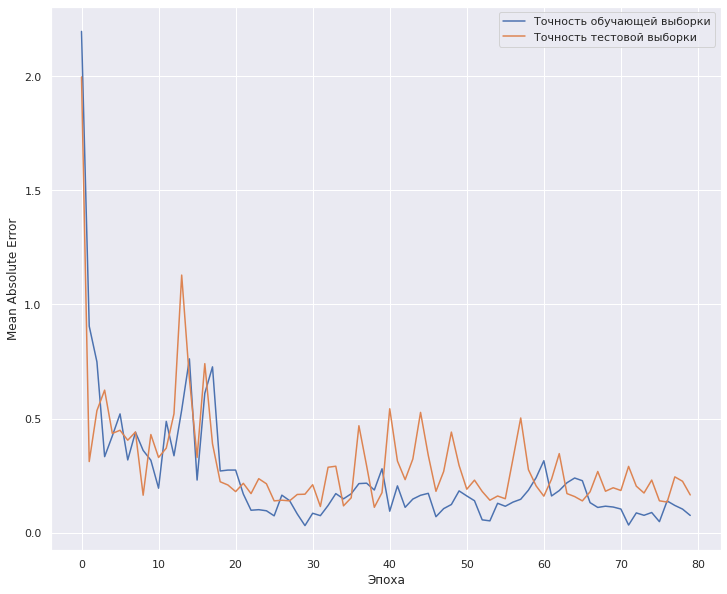

In [65]:
plt.plot(history.history['loss'],
         label = 'Точность обучающей выборки')

plt.plot(history.history['val_loss'],
         label = 'Точность тестовой выборки')
plt.xlabel('Эпоха')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

## Сохранение модели

In [66]:
import pickle

In [67]:
with open('model_nn.pkl', 'wb') as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://6cffcdd7-1663-4c90-9a8b-289ca44f57a2/assets


In [68]:
model.predict([X])


array([[ 0.01146782],
       [ 0.06494239],
       [-0.01795903],
       [ 0.30860254],
       [ 0.27870372],
       [ 0.2881029 ],
       [ 0.2737819 ],
       [ 0.20902428],
       [ 0.24623346],
       [ 0.40709513],
       [ 0.3570754 ],
       [ 0.46316734],
       [ 0.29144293],
       [ 0.27978486],
       [ 0.29513833],
       [ 0.22938508],
       [ 0.24505007],
       [ 0.21586305],
       [ 0.22288087],
       [ 0.43384197],
       [ 0.54612404],
       [ 0.59332204],
       [ 0.61603993],
       [ 0.59371334],
       [ 0.67688084],
       [ 0.50379187],
       [ 0.54780704],
       [ 0.62616813],
       [ 0.5690835 ],
       [ 0.65156686],
       [ 0.6488433 ],
       [ 0.5838526 ],
       [ 0.34289634],
       [ 0.6464129 ],
       [ 0.584297  ],
       [ 0.56096745],
       [ 0.4541636 ],
       [ 0.6015112 ],
       [ 0.4807491 ],
       [ 0.59738946]], dtype=float32)

In [69]:
with open('model_nn.pkl', 'rb') as f:
  load_model = pickle.load(f)

In [70]:
load_model.predict([X])

array([[ 0.01146782],
       [ 0.06494239],
       [-0.01795903],
       [ 0.30860254],
       [ 0.27870372],
       [ 0.2881029 ],
       [ 0.2737819 ],
       [ 0.20902428],
       [ 0.24623346],
       [ 0.40709513],
       [ 0.3570754 ],
       [ 0.46316734],
       [ 0.29144293],
       [ 0.27978486],
       [ 0.29513833],
       [ 0.22938508],
       [ 0.24505007],
       [ 0.21586305],
       [ 0.22288087],
       [ 0.43384197],
       [ 0.54612404],
       [ 0.59332204],
       [ 0.61603993],
       [ 0.59371334],
       [ 0.67688084],
       [ 0.50379187],
       [ 0.54780704],
       [ 0.62616813],
       [ 0.5690835 ],
       [ 0.65156686],
       [ 0.6488433 ],
       [ 0.5838526 ],
       [ 0.34289634],
       [ 0.6464129 ],
       [ 0.584297  ],
       [ 0.56096745],
       [ 0.4541636 ],
       [ 0.6015112 ],
       [ 0.4807491 ],
       [ 0.59738946]], dtype=float32)